In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

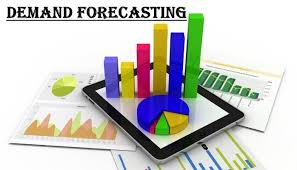

In [63]:
train = pd.read_csv('train_0irEZ2H.csv') 
test = pd.read_csv('test_nfaJ3J5.csv')
sample = pd.read_csv('sample_submission_pzljTaX.csv')

# sku - stock-keeping unit

Change week to date time

In [64]:
train['week'] = pd.to_datetime(train['week'])
test['week'] = pd.to_datetime(test['week'])

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\4282297963.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['week'] = pd.to_datetime(train['week'])
C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\4282297963.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['week'] = pd.to_datetime(test['week'])


# Exploratory data analysis

In [65]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [66]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [67]:
train.apply(lambda x: len(x.unique()))

record_ID          150150
week                  130
store_id               76
sku_id                 28
total_price           647
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

In [68]:
test.apply(lambda x: len(x.unique()))

record_ID          13860
week                  12
store_id              76
sku_id                28
total_price          442
base_price           370
is_featured_sku        2
is_display_sku         2
dtype: int64

In [69]:
print(train['is_featured_sku'].value_counts()/train['is_featured_sku'].shape[0])

print(test['is_featured_sku'].value_counts()/test['is_featured_sku'].shape[0])

is_featured_sku
0    0.904389
1    0.095611
Name: count, dtype: float64
is_featured_sku
0    0.91342
1    0.08658
Name: count, dtype: float64


In [70]:
print(train['is_display_sku'].value_counts()/train['is_display_sku'].shape[0])

print(test['is_display_sku'].value_counts()/test['is_display_sku'].shape[0])

is_display_sku
0    0.8668
1    0.1332
Name: count, dtype: float64
is_display_sku
0    0.866667
1    0.133333
Name: count, dtype: float64


Conclusion - Balanced data set

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_ID        13860 non-null  int64         
 1   week             13860 non-null  datetime64[ns]
 2   store_id         13860 non-null  int64         
 3   sku_id           13860 non-null  int64         
 4   total_price      13860 non-null  float64       
 5   base_price       13860 non-null  float64       
 6   is_featured_sku  13860 non-null  int64         
 7   is_display_sku   13860 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 866.4 KB


is_featured_sku and is_display_sku -> Units  = 1

In [73]:
train.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold'],
      dtype='object')

In [74]:
start = []
end = []
ct = 0
for store in list(set(train['store_id'])):
    temp_of_train = train[train['store_id'] == store]
    temp_of_test = test[test['store_id'] == store]
    for sku in list(set(temp_of_train['sku_id'])):
        
        train_df = temp_of_train[temp_of_train['sku_id'] == sku]
        test_df = temp_of_test[temp_of_test['sku_id'] == sku]
        
        train_df.sort_values("week")
        test_df.sort_values("week")
        print(store,sku)
        print(train_df['week'].iloc[-1])
        start.append(train_df['week'].iloc[-1])
        print(test_df['week'].iloc[0])
        end.append(test_df['week'].iloc[0])
        print(test_df)
        
        
        ct+=1

9984 219009
2013-09-07 00:00:00
2013-07-16 00:00:00
       record_ID       week  store_id  sku_id  total_price  base_price  \
1144      214271 2013-07-16      9984  219009     201.6375    201.6375   
2299      215908 2013-07-23      9984  219009     208.0500    208.0500   
3454      217545 2013-07-30      9984  219009     218.7375    218.7375   
4609      219185 2013-06-08      9984  219009     198.7875    218.7375   
5764      220816 2013-08-13      9984  219009     218.0250    218.0250   
6919      222454 2013-08-20      9984  219009     190.2375    218.0250   
8074      224094 2013-08-27      9984  219009     218.7375    218.7375   
9229      225723 2013-03-09      9984  219009     211.6125    211.6125   
10384     227355 2013-10-09      9984  219009     201.6375    201.6375   
11539     228995 2013-09-17      9984  219009     213.7500    213.7500   
12694     230633 2013-09-24      9984  219009     218.7375    218.7375   
13849     232275 2013-01-10      9984  219009     218.7375  

In [75]:
print(Counter(start))
print(Counter(end))

Counter({Timestamp('2013-09-07 00:00:00'): 1155})
Counter({Timestamp('2013-07-16 00:00:00'): 1155})


For each store and sku pair, the start and end is same

end of train - 2013-09-07


start of test - 2013-07-23

Same store and same sku_id in both test and train

# Data Visualization

Text(0, 0.5, 'units_sold')

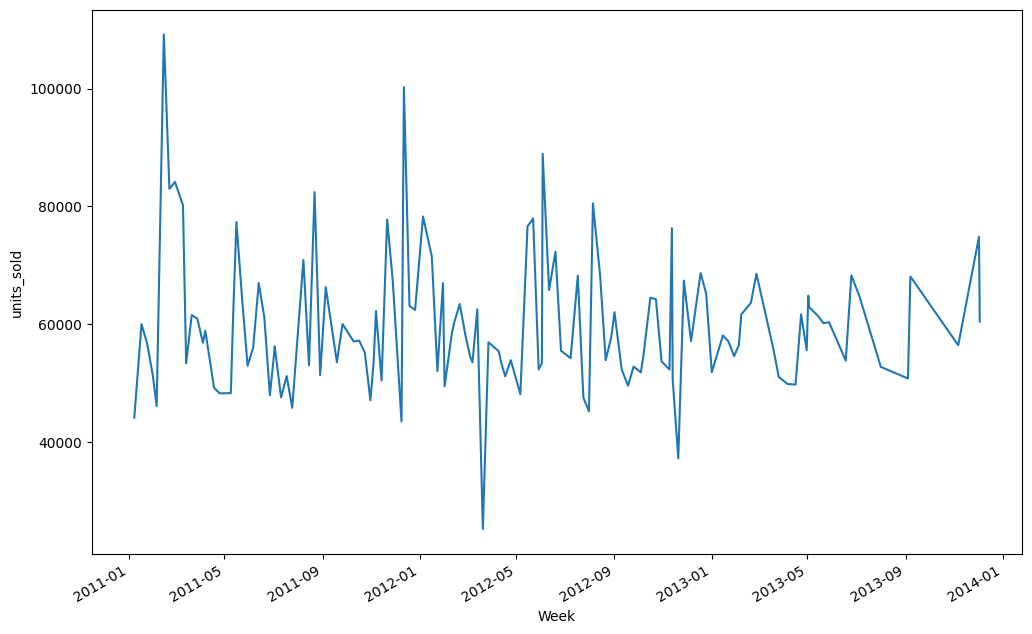

In [76]:
train.groupby('week').sum()['units_sold'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('units_sold')

Text(0, 0.5, 'total_price')

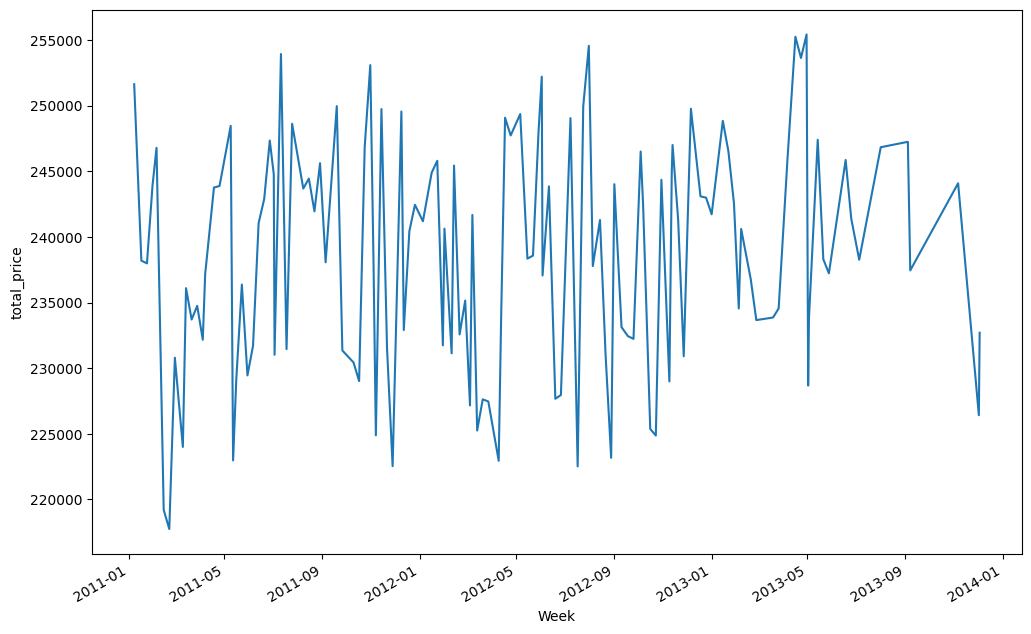

In [77]:
train.groupby('week').sum()['total_price'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('total_price')

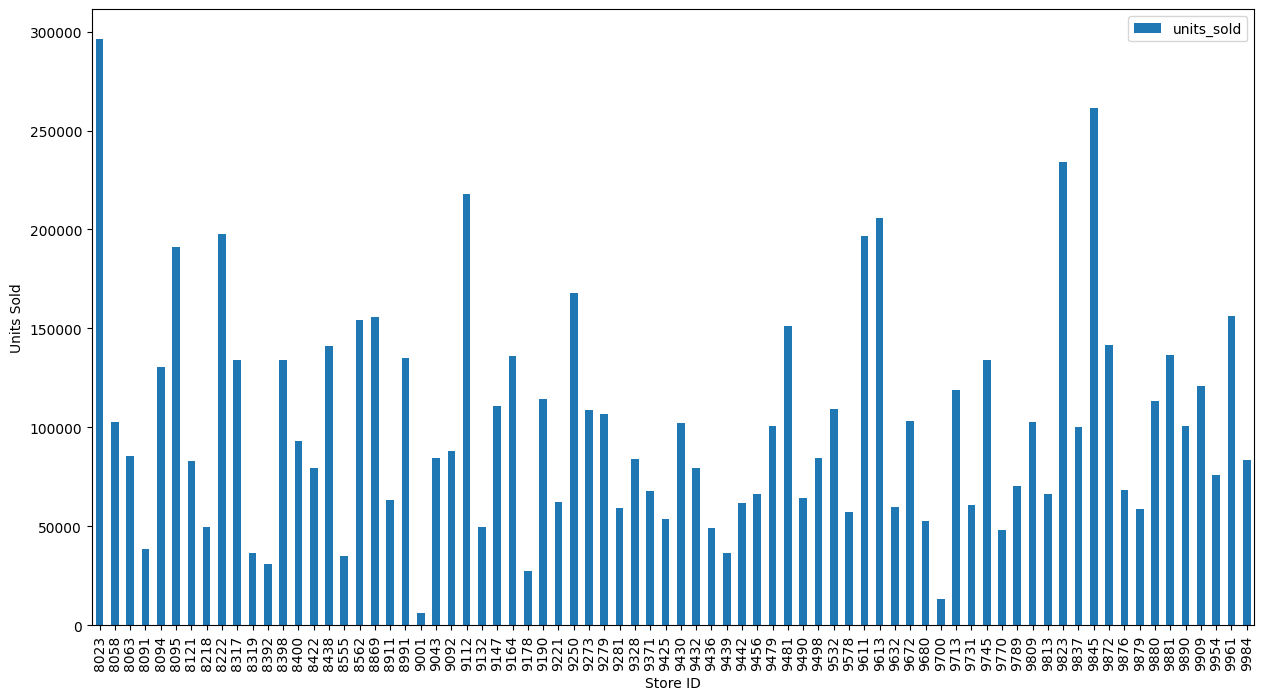

In [78]:
# Ensure only numeric columns are included in the aggregation
train.groupby('store_id')[['units_sold']].sum().plot(kind='bar', figsize=(15, 8))

# Add labels
plt.xlabel('Store ID')
plt.ylabel('Units Sold')
plt.show()


Text(0, 0.5, 'units_sold')

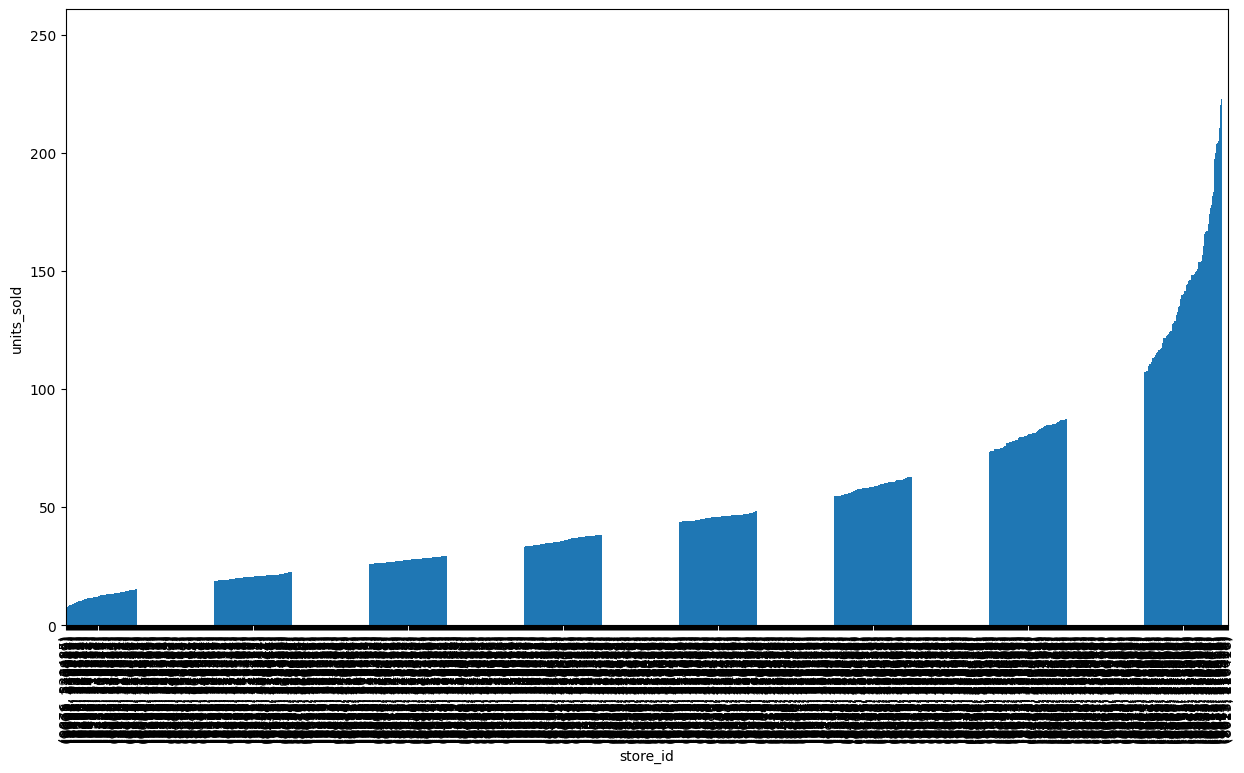

In [79]:
train.groupby(['store_id','sku_id']).mean()['units_sold'].sort_values().plot(figsize=(15,8),kind='bar')

plt.xlabel('store_id')
plt.ylabel('units_sold')

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\4058306906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['total_price'])


<Axes: xlabel='total_price', ylabel='Density'>

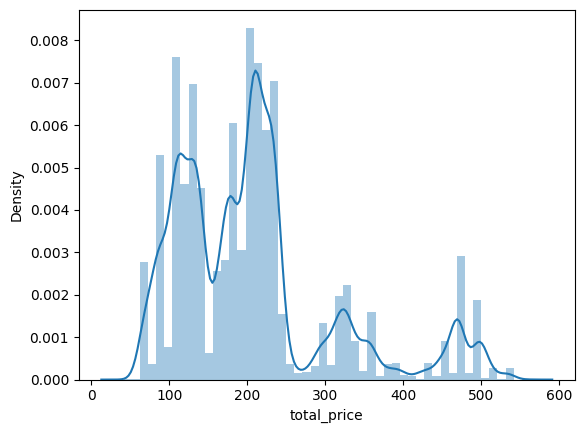

In [80]:
import seaborn as sns
sns.distplot(train['total_price'])

# Handling missing values

In [81]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

One missing value

In [82]:
train[train['total_price'].isna() == True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,2013-04-23,9436,245338,NaN,469.5375,0,0,1


<Axes: xlabel='week'>

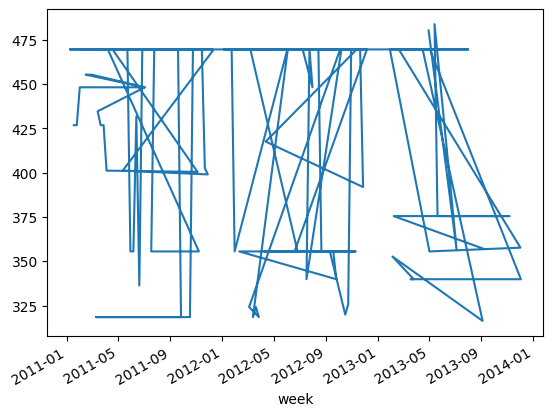

In [83]:
train[(train['store_id']==9436) & (train['sku_id']==245338) ].set_index('week')['total_price'].plot()

In [84]:
train[(train['store_id']==9436) & (train['sku_id']==245338) & (train['week'] >= datetime.datetime.strptime('2013-04-23', '%Y-%M-%d'))]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
119624,169396,2013-08-01,9436,245338,469.5375,469.5375,0,0,7
123089,174299,2013-01-29,9436,245338,469.5375,469.5375,0,0,4
124244,175917,2013-05-02,9436,245338,355.5375,469.5375,0,1,20
125399,177544,2013-12-02,9436,245338,357.6750,469.5375,1,1,67
126554,179175,2013-02-19,9436,245338,469.5375,469.5375,0,0,7
127709,180808,2013-02-26,9436,245338,469.5375,469.5375,0,0,9
128864,182447,2013-05-03,9436,245338,469.5375,469.5375,0,0,4
130019,184085,2013-12-03,9436,245338,339.8625,469.5375,1,0,33
131174,185728,2013-03-19,9436,245338,339.8625,469.5375,1,1,30
132329,187366,2013-03-26,9436,245338,339.8625,469.5375,1,1,16


Interpolating the value

In [85]:
train = train.fillna(475)

In [86]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# Data preprocessing 

In [90]:
#df = train.append(test)
# Replace train.append(test) with pd.concat()
df = pd.concat([train, test], ignore_index=True)


In [91]:
df.shape

(164010, 9)

In [92]:
column=['sku_id','store_id']
name='count_id_sku_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\1287640201.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(np.median(temp[name]),inplace=True)


In [93]:
column = ['sku_id']
name='count_id_sku'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\2346169538.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(np.median(temp[name]),inplace=True)


In [94]:
column = ['store_id']
name='count_id_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\2514784662.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(np.median(temp[name]),inplace=True)


In [97]:
df['price_diff_percent'] = (df['base_price'] - df['total_price']) / df['base_price']

Week

In [98]:
df['Month'] = pd.to_datetime(df['week']).dt.month

df['Day'] = pd.to_datetime(df['week']).dt.day

df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

df['Week'] = pd.to_datetime(df['week']).dt.isocalendar().week  # Use isocalendar().week

df['Quarter'] = pd.to_datetime(df['week']).dt.quarter 

df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)

In [99]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,...,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Is_weekday
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,142.0,...,17,3,1,False,False,False,False,False,False,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,142.0,...,17,3,1,False,False,False,False,False,False,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,142.0,...,17,3,1,False,False,False,False,False,False,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,142.0,...,17,3,1,False,False,False,False,False,False,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,142.0,...,17,3,1,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,9984,223245,241.5375,241.5375,0,0,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0
164006,232282,2013-01-10,9984,223153,240.8250,240.8250,0,0,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0
164007,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0
164008,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,NaN,142.0,...,10,2,1,False,False,False,False,False,False,0


Label encoding

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
df.dtypes

record_ID                      int64
week                  datetime64[ns]
store_id                       int64
sku_id                         int64
total_price                  float64
base_price                   float64
is_featured_sku                int64
is_display_sku                 int64
units_sold                   float64
count_id_sku_store           float64
count_id_sku                 float64
count_id_store               float64
price_diff_percent           float64
Month                          int32
Day                            int32
Dayofweek                      int32
DayOfyear                      int32
Week                          UInt32
Quarter                        int32
Is_month_start                  bool
Is_month_end                    bool
Is_quarter_start                bool
Is_quarter_end                  bool
Is_year_start                   bool
Is_year_end                     bool
Is_weekday                     int64
dtype: object

In [102]:
df.select_dtypes(exclude=["int","float"]).columns

Index(['week', 'Week', 'Is_month_start', 'Is_month_end', 'Is_quarter_start',
       'Is_quarter_end', 'Is_year_start', 'Is_year_end'],
      dtype='object')

In [103]:
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']

In [104]:
for i in col:
    df = pd.get_dummies(df, columns=[i])

In [105]:
df

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,1,2011-01-17,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,...,True,False,True,False,True,False,True,True,False,True
1,2,2011-01-17,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,...,True,False,True,False,True,False,True,True,False,True
2,3,2011-01-17,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,...,True,False,True,False,True,False,True,True,False,True
3,4,2011-01-17,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,...,True,False,True,False,True,False,True,True,False,True
4,5,2011-01-17,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,...,True,False,True,False,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,...,True,False,True,False,True,False,True,True,False,True
164006,232282,2013-01-10,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,...,True,False,True,False,True,False,True,True,False,True
164007,232285,2013-01-10,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,...,True,False,True,False,True,False,True,True,False,True
164008,232286,2013-01-10,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,...,True,False,True,False,True,False,True,True,False,True


In [106]:
df.drop(['record_ID','week'],inplace=True,axis=1)

In [107]:
df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.11465,1,...,True,False,True,False,True,False,True,True,False,True
1,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.00000,1,...,True,False,True,False,True,False,True,True,False,True
2,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.00000,1,...,True,False,True,False,True,False,True,True,False,True
3,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.00000,1,...,True,False,True,False,True,False,True,True,False,True
4,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.00000,1,...,True,False,True,False,True,False,True,True,False,True


C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\3041009628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_price'])


<Axes: xlabel='total_price', ylabel='Density'>

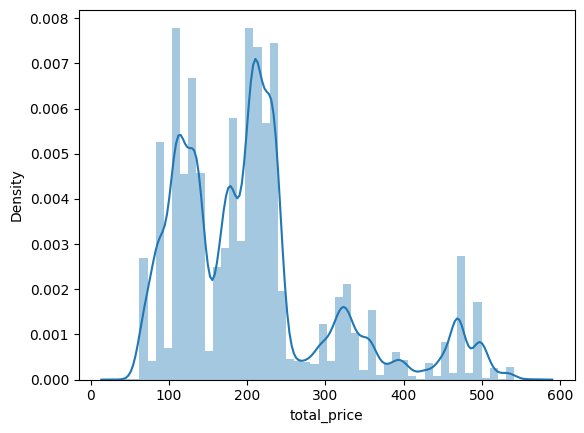

In [108]:
import seaborn as sns
sns.distplot(df['total_price'])

In [109]:
df['total_price']=np.log1p(df['total_price'])
df['base_price']=np.log1p(df['base_price'])
df['units_sold'] = np.log1p(df['units_sold'])

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\3098280409.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_price'])


<Axes: xlabel='total_price', ylabel='Density'>

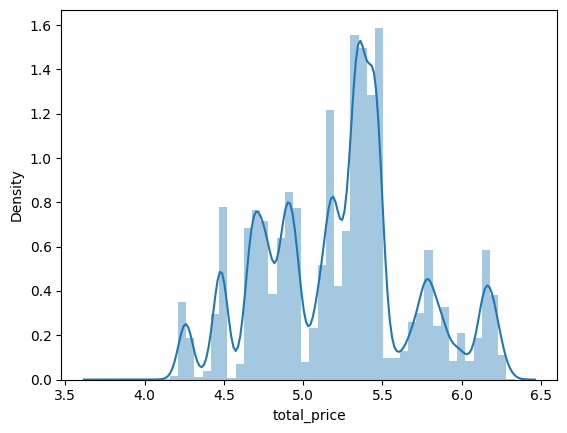

In [110]:
sns.distplot(df['total_price'])

In [111]:
tests = df[df['units_sold'].isna() == True]
trains = df[df['units_sold'].isna() == False]

In [112]:
print(trains.shape,tests.shape)

(150150, 130) (13860, 130)


In [113]:
del tests['units_sold']

In [114]:
trains.corr()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
total_price,1.000000,0.964818,0.055316,-0.095097,-0.307979,NaN,-2.054021e-01,7.443723e-02,-0.086049,0.004914,...,0.001636,-0.001636,-0.011940,0.011940,0.002686,-0.002686,NaN,0.002686,-0.002686,NaN
base_price,0.964818,1.000000,0.194962,0.005290,-0.223743,NaN,-2.046420e-01,7.424288e-02,0.177274,0.001780,...,0.004799,-0.004799,-0.002761,0.002761,0.003631,-0.003631,NaN,0.003631,-0.003631,NaN
is_featured_sku,0.055316,0.194962,1.000000,0.426243,0.280215,NaN,-1.153827e-02,1.184017e-02,0.546044,0.005281,...,-0.019447,0.019447,0.035232,-0.035232,-0.000148,0.000148,NaN,-0.000148,0.000148,NaN
is_display_sku,-0.095097,0.005290,0.426243,1.000000,0.337428,NaN,-4.968837e-02,2.507404e-02,0.381251,-0.031031,...,0.005378,-0.005378,0.019389,-0.019389,0.006023,-0.006023,NaN,0.006023,-0.006023,NaN
units_sold,-0.307979,-0.223743,0.280215,0.337428,1.000000,NaN,4.102099e-01,1.451099e-01,0.308244,0.023590,...,0.015634,-0.015634,0.021612,-0.021612,0.023150,-0.023150,NaN,0.023150,-0.023150,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Is_quarter_start_True,-0.002686,-0.003631,0.000148,-0.006023,-0.023150,NaN,4.595182e-15,3.183586e-15,-0.003869,-0.131387,...,-0.494152,0.494152,0.017609,-0.017609,-1.000000,1.000000,NaN,-1.000000,1.000000,NaN
Is_quarter_end_False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is_year_start_False,0.002686,0.003631,-0.000148,0.006023,0.023150,NaN,-4.581128e-15,-3.229616e-15,0.003869,0.131387,...,0.494152,-0.494152,-0.017609,0.017609,1.000000,-1.000000,NaN,1.000000,-1.000000,NaN
Is_year_start_True,-0.002686,-0.003631,0.000148,-0.006023,-0.023150,NaN,4.595182e-15,3.183586e-15,-0.003869,-0.131387,...,-0.494152,0.494152,0.017609,-0.017609,-1.000000,1.000000,NaN,-1.000000,1.000000,NaN


In [115]:
X = trains.drop('units_sold',axis = 1)
Y = train['units_sold']

In [116]:
# Perform cross-validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [117]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2,random_state=23)

In [118]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [120]:
rf_base = RandomForestRegressor()
rf_base.fit(x_train,y_train)

rf_tuned = RandomForestRegressor(
    bootstrap=True, 
    criterion='squared_error',  # Use 'squared_error' instead of 'mse' (updated in Scikit-learn)
    max_depth=30,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,  # Keep this instead of 'min_impurity_split'
    min_samples_leaf=1,
    min_samples_split=10,
    min_weight_fraction_leaf=0.0,
    n_estimators=600,
    n_jobs=None,
    oob_score=True,
    random_state=None,
    verbose=0,
    warm_start=False
)

rf_tuned.fit(x_train, y_train)


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=600, oob_score=True)

In [121]:
import lightgbm as lgb

In [122]:
model_lgb_base=lgb.LGBMRegressor(objective='regression')
model_lgb_base.fit(x_train,y_train)

model_lgb_tuned=lgb.LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=200, n_jobs=-1,
              num_leaves=1200, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

model_lgb_tuned.fit(x_train,y_train)

c:\Users\lapto\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lapto\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\lapto\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lapto\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 120120, number of used features: 125
[LightGBM] [Info] Start training from score 51.714336
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warnin

LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, feature_fraction=0.5,
              max_depth=30, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=200, n_jobs=-1,
              num_leaves=1200, silent=True)

In [123]:
def rmlse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true)-np.log1p(y_pred), 2)))

In [124]:
prediction_rfb_valid=rf_base.predict(x_valid)
prediction_rft_valid=rf_tuned.predict(x_valid)
prediction_lgbmb_valid=model_lgb_base.predict(x_valid)
prediction_lgbmt_valid=model_lgb_tuned.predict(x_valid)

rf_base_msle=100*rmlse(y_valid,prediction_rfb_valid)
rf_tuned_msle=100*rmlse(y_valid,prediction_rft_valid)
lgbm_base_msle=100*rmlse(y_valid,prediction_lgbmb_valid)
lgbm_tuned_msle=100*rmlse(y_valid,prediction_lgbmt_valid)

prediction_ensemble_base=(((1-rf_base_msle)*prediction_rfb_valid)+((1-lgbm_base_msle)*prediction_lgbmb_valid))/(2-rf_base_msle-lgbm_base_msle)
prediction_ensemble_tuned=(((1-rf_tuned_msle)*prediction_rft_valid)+((1-lgbm_tuned_msle)*prediction_lgbmt_valid))/(2-rf_tuned_msle-lgbm_tuned_msle)

ensemble_base_msle=100*rmlse(y_valid,prediction_ensemble_base)
ensemble_tuned_msle=100*rmlse(y_valid,prediction_ensemble_tuned)


print("RF Base: {}; RF Tuned: {}".format(rf_base_msle,rf_tuned_msle))
print("LGBM Base: {}; LGBM Tuned: {}".format(lgbm_base_msle,lgbm_tuned_msle))
print("Ensemble Base: {}; Ensemble Tuned: {}".format(ensemble_base_msle,ensemble_tuned_msle))

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
RF Base: 38.87990317458303; RF Tuned: 42.96322737359049
LGBM Base: 47.662380281379555; LGBM Tuned: 38.629992523663724
Ensemble Base: 41.90220256238908; Ensemble Tuned: 38.21838480113755


C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\679971929.py:2: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true)-np.log1p(y_pred), 2)))


In [125]:
model = lgb.LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=100, n_jobs=-1,
              num_leaves=1400, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

model.fit(X,Y)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the ov

LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, feature_fraction=0.5,
              max_depth=30, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_jobs=-1, num_leaves=1400, silent=True)

In [126]:
prediction=model.predict(tests)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [127]:
final_prediction=np.round(np.expm1(prediction))
sample['units_sold']=final_prediction


In [128]:
sample['units_sold'] = sample['units_sold'].abs()

In [129]:
sample.to_csv('submissions.csv',index=False,encoding='utf-8')

Model - Another approach

In [130]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [131]:
def RMSLE(actual, predicted):

    predicted = np.array([np.log(np.abs(x+1.0)) for x in predicted])  # doing np.abs for handling neg values  
    actual = np.array([np.log(np.abs(x+1.0)) for x in actual])
    log_err = actual-predicted
    
    return 1000*np.sqrt(np.mean(log_err**2))

In [132]:
preds = reg.predict(tests)
#print(f'The validation RMSLE error for baseline model is: {RMSLE(np.exp(x_valid), np.exp(preds))}')

In [133]:
print(preds)

[27.9  29.34 23.27 ... 49.3  12.24  8.55]


In [134]:
final_prediction_rf=np.round((preds))
sample['units_sold']=final_prediction_rf
sample['units_sold']
sample['units_sold'] = sample['units_sold'].abs()
sample.to_csv('submissions_base.csv',index=False,encoding='utf-8')

Rank - 75

In [135]:
Xtrain, Xval, ytrain, yval = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape)

(120120, 129) (120120,) (30030, 129) (30030,)


In [142]:
def runLGB(Xtrain, ytrain, Xval, yval, cat_cols, Xtest=None):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'l1',  # Mean Absolute Error
        'learning_rate': 0.1,
        'min_data_in_leaf': 10,
        'verbosity': 1  # Use -1 to silence, 1 for info
    }

    n_estimators = 800
    early_stopping_rounds = 10

    # Create LightGBM datasets
    d_train = lgb.Dataset(Xtrain.copy(), label=ytrain.copy(), categorical_feature=cat_cols)
    d_valid = lgb.Dataset(Xval.copy(), label=yval.copy(), categorical_feature=cat_cols)

    # Train the model
    model = lgb.train(
        params=params,
        train_set=d_train,
        num_boost_round=n_estimators,  # Total number of boosting iterations
        valid_sets=[d_train, d_valid],  # Validation sets for monitoring
        callbacks=[
            lgb.early_stopping(stopping_rounds=early_stopping_rounds),  # Early stopping
            lgb.log_evaluation(10)  # Log every 10 iterations
        ]
    )

    # Predict on validation data
    preds = model.predict(Xval, num_iteration=model.best_iteration)
    err = RMSLE(yval, np.exp(preds))  # Replace with your RMSLE implementation

    # Predict on test data if provided
    if Xtest is not None:
        preds_test = model.predict(Xtest, num_iteration=model.best_iteration)
    else:
        preds_test = None

    return preds, err, np.exp(preds_test) if preds_test is not None else None, model


In [143]:
pred_val, err, pred_test,model = runLGB(Xtrain, ytrain, Xval, yval, list(X.select_dtypes(exclude=["int","float"]).columns), tests)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 120120, number of used features: 125
[LightGBM] [Info] Start training from score 51.525641
Training until validation scores don't improve for 10 rounds
[10]	training's l1: 23.9164	valid_1's l1: 24.3906
[20]	training's l1: 20.1184	valid_1's l1: 20.6495
[30]	training's l1: 18.4592	valid_1's l1: 18.9853
[40]	training's l1: 17.365	valid_1's l1: 17.9331
[50]	training's l1: 16.6292	valid_1's l1: 17.2631
[60]	training's l1: 16.0943	valid_1's l1: 16.755
[70]	training's l1: 15.7325	valid_1's l1: 16.4267
[80]	training's l1: 15.4048	valid_1's l1: 16.1384
[90]	training's l1: 15.1485	valid_1's l1: 15.9123
[100]	training's l1: 14.9162	valid_1's l1: 15.7041
[110]	training's l1: 14.7121	va

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\2381365686.py:32: RuntimeWarning: overflow encountered in exp
  err = RMSLE(yval, np.exp(preds))  # Replace with your RMSLE implementation
C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\2381365686.py:40: RuntimeWarning: overflow encountered in exp
  return preds, err, np.exp(preds_test) if preds_test is not None else None, model


In [144]:

final_prediction=np.round(np.expm1(pred_test))
sample['units_sold'] = final_prediction
sample.to_csv('lgb_v1.csv', index = False)

C:\Users\lapto\AppData\Local\Temp\ipykernel_23932\1365079226.py:1: RuntimeWarning: overflow encountered in expm1
  final_prediction=np.round(np.expm1(pred_test))
